# INTRODUCTION  
An exoplanet or extrasolar planet is a planet outside the Solar System.The first possible evidence of an exoplanet was noted in 1917, but was not recognized as such.  
For centuries scientists, philosophers, and science fiction writers suspected that extrasolar planets existed, but there was no way of knowing whether they existed, how common they were, or how similar they might be to the planets of the Solar System. Various detection claims made in the nineteenth century were rejected by astronomers.

There are many ways of detecting exoplanet:  
->  Direct Imaging  
->  Microlensing  
->  Transit  
->  Radial Velocity  
->  Timing  

The method implemented in this project is the 'Transit Method'.

-> The transit method is a photometric method that aims to indirectly detect the presence of one or more exoplanets in      orbit around a star.

The transit method consists of regularly measuring the luminosity of a star in order to detect the periodic decrease in luminosity associated with the transit of an exoplanet. The transit happen when a planet passes in front of its star. On the other hand, when the planet passes behing the star, it is called an eclipse. The effect measured during a transit is quite small. For a star the size of the Sun, the transit of a Jupiter-size planet will cause a decrease in apparent luminosity of about 1%, while this decrease will be of about 0.001% for a planet the size of the Earth.

This method makes it possible to determine the radius of the planet as well as its period of revolution. Furthermore, if the planet has already been detected using the radial velocity method, then its mass is known and it is possible to obtain a value for the bulk density of the planet.

# SETUP  
We are using the transit method to detect planets and need to get information about the flux detected over a long period of time. To get this data have used open source websites like:  
-> https://exoplanets.nasa.gov/exoplanet-catalog/7320/hd-136352-b/ : This link is used to verify if the planet is already discovered and catalogued.  
-> https://exo.mast.stsci.edu/ : This website is used to get data of already discovered exoplanets  
-> https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html?searchID=CAOMBYOBS&mastURL=c44bb8468fa941cda1830fed0cd06c48         : This link is used to get data for all exoplanets (discovered planets and planets yet to be discoverd)  
-> https://www.youtube.com/watch?v=J2yD9JrqllA   : Youtube video refererred for learning purposes  
-> https://docs.lightkurve.org/ : To get additional data to process information from file  

TOOLS REQUIRED: 

-> Lightkurve : LightCurve objects are data objects which encapsulate the brightness of a star over time. They provide a                   series of common operations, for example folding, binning, plotting, etc.  
-> 'lightkurve' library to be installed("pip install lightkurve" command maybe used)  
-> TessTargetPixelFile library : Used to read the data from the file downloaded  
-> numpy library : to plot periodogram  

Functions Used :  
-> to_lightkurve()   : converts image pixel to a 'lightkurve'  
-> read()            : to read data from file(the parameter for this is the path of the file)    
-> scatter(), plot() : to view the data in graphical format  
-> fold()            : Returns a FoldedLightCurve object folded on a period and epoch  
-> flatten()         : Removes the low frequency trend  
-> bin()             : If the original light curve contains flux uncertainties ( flux_err ), the binned lightcurve will                            report the root-mean-square error. If no uncertainties are included, the binned curve will return                          the standard deviation of the data  
-> to_periodogram()  : Smooths the power spectrum  

# PROCESS
In this project only 6 stars' data was processed 

ERROR: Invalid requirement: '#installing'


Best fit period: 7.20000 d


<ipython-input-2-aecf17bf5d8a>:36: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  tpfbin=tpf_fold.bin(binsize=5)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

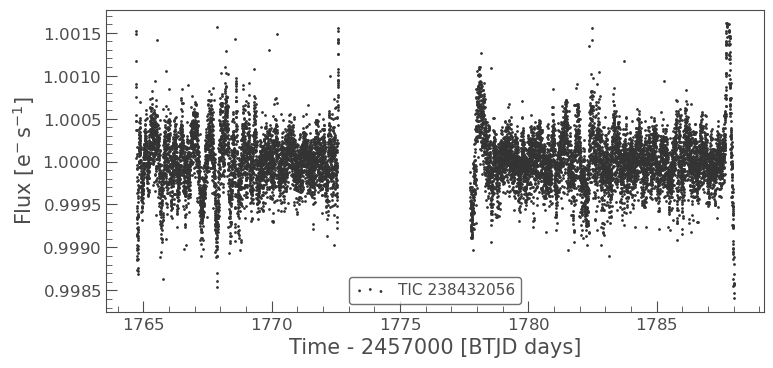

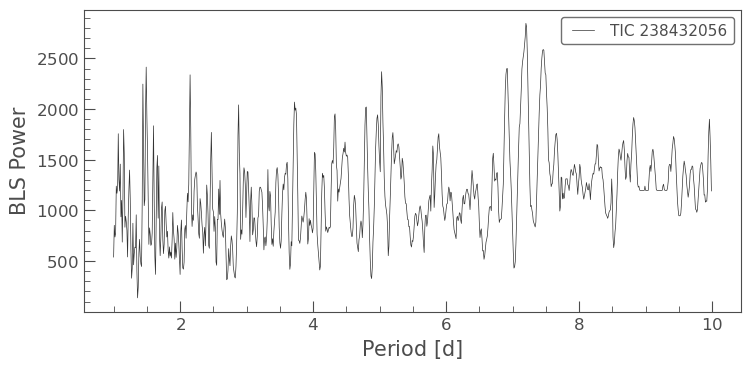

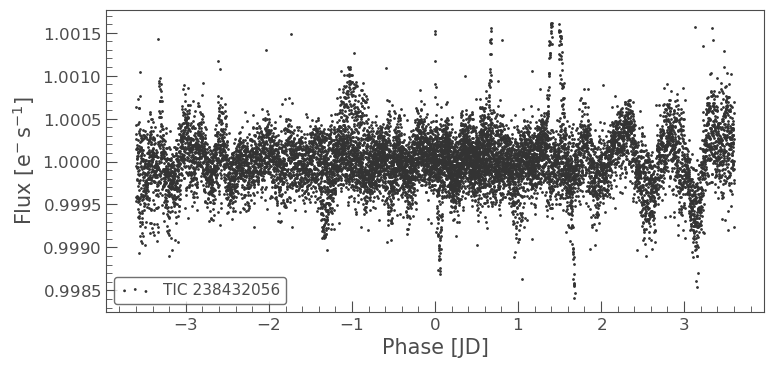

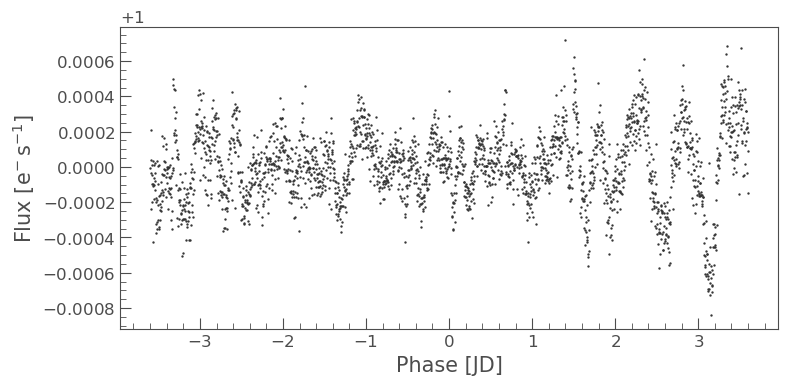

In [2]:
import os
s=os.path.sep
import sys
!{sys.executable} -m pip install lightkurve #installing lightkurve library

import lightkurve as lk
from lightkurve import TessTargetPixelFile

#pixelfile=search_targetpixelfile("KIC 8462852", quarter =16).download(quality_bitmask='hardest');

#pixelfile.plot(frame=1)  
# The above are used to convert the data from image pixels to lightcurves 
#Since we get the data from the websites directly as lightkurves the above statements are not required

#######################################  TIC 238432056   #####################################################

from lightkurve import TessTargetPixelFile
tpf=lk.read("E:"+s+"Astronomy"+s+"Exoplanet detection"+s+"MAST_2021-08-19T0553- exo-plan-1"+s+"TESS"+s+"tess2019279210107-s0017-0000000238432056-0161-s"+s+"tess2019279210107-s0017-0000000238432056-0161-s_lc.fits")
tpf

#tpf.scatter()
tpf_flat=tpf.flatten(window_length=1001)
tpf_flat= tpf_flat.remove_outliers(sigma=5)
tpf_flat.scatter()

import numpy as np
periodogram=tpf_flat.to_periodogram(method='bls',period=np.arange(1,10,0.01))
periodogram.plot()

best_fit_period=periodogram.period_at_max_power           # used to find the period of the exoplanet exactly 
print("Best fit period: {:.5f}".format(best_fit_period))   # .5f : returns period upto 5 decimal precision

tpf_fold=tpf_flat.fold(period=7.2)
tpf_fold.scatter()

tpfbin=tpf_fold.bin(binsize=5)
tpfbin.scatter(s=2)

Even though there is variation in the intensity of light in the above star it doesn't appear to be due to a planet orbiting it; it could be a variable star.Therefore TIC 238432056 doesnot have a planet orbiting it.

Best fit period: 1.47262 d


<ipython-input-3-cb70d1a168ad>:26: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lk2bin=lk2_fold.bin(binsize=5)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

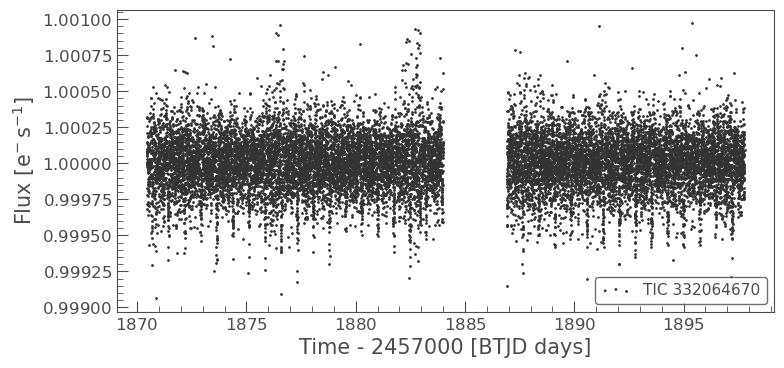

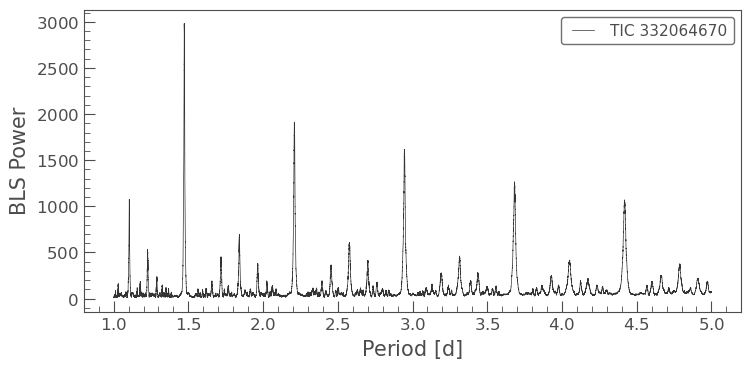

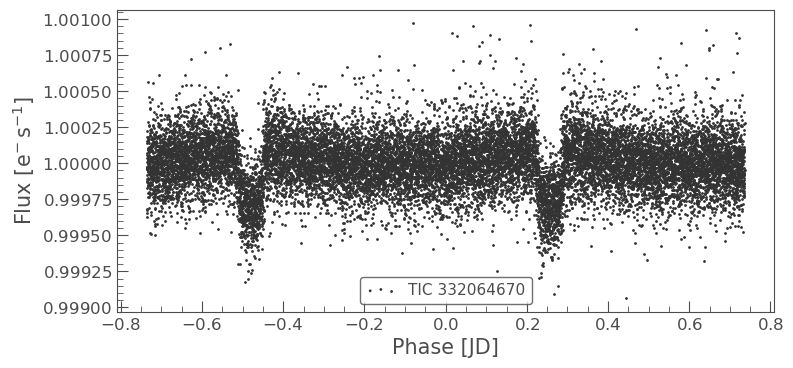

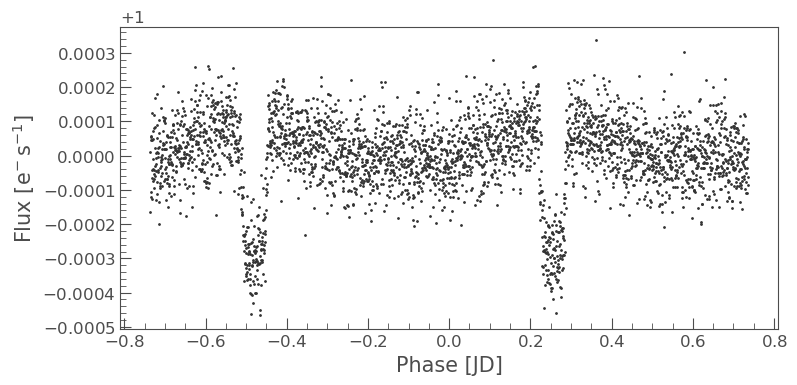

In [3]:

########################################   TIC 332064670  ##################################################

import lightkurve as lk
from lightkurve import TessTargetPixelFile
import os
s=os.path.sep

from lightkurve import TessTargetPixelFile
lk2=lk.read("E:"+s+"Astronomy"+s+"Exoplanet detection"+s+"MAST_2021-08-19T1158- exo-plan-2"+s+"TESS"+s+"tess2020020091053-s0021-0000000332064670-0167-s"+s+"tess2020020091053-s0021-0000000332064670-0167-s_lc.fits")
lk2

lk2_flat=lk2.flatten(window_length=401)
lk2_flat= lk2_flat.remove_outliers(sigma=5)
lk2_flat.scatter()

import numpy as np
periodogram=lk2_flat.to_periodogram(method='bls',period=np.arange(1,5,0.00001))
periodogram.plot()

best_fit_period=periodogram.period_at_max_power
print("Best fit period: {:.5f}".format(best_fit_period))

lk2_fold=lk2_flat.fold(period=1.47262)
lk2_fold.scatter()

lk2bin=lk2_fold.bin(binsize=5)
lk2bin.scatter()

From the flux against time graph we see that there is a periodic variation in the intensity of light from the star so, it could have a planet orbiting it(or could be a variable star)

So we plot a periodogram for the same to better understand the information and conclude about the same.  
From the last graph : flux against time graph we see that there is recognisable dip, which verifies that the star has an exoplanet. Since the planet has already been verified by the authorities our process of determination and the
conclusion arrived is correct. A planet is going around the star : TIC 332064670

Best fit period = 6.270 d


<ipython-input-4-f65a92ccb82d>:28: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lk3bin=lk3_fold.bin(binsize=2)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

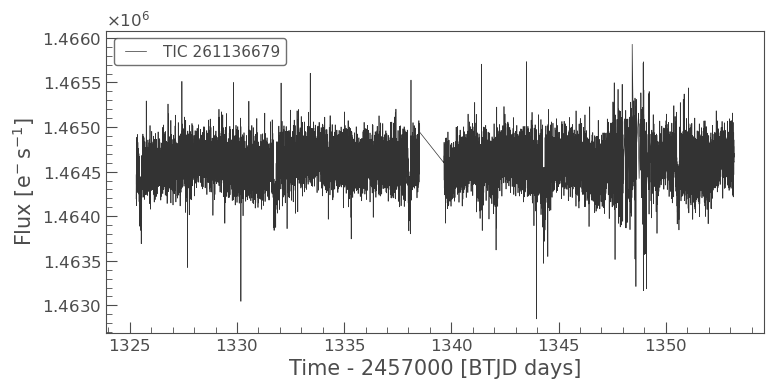

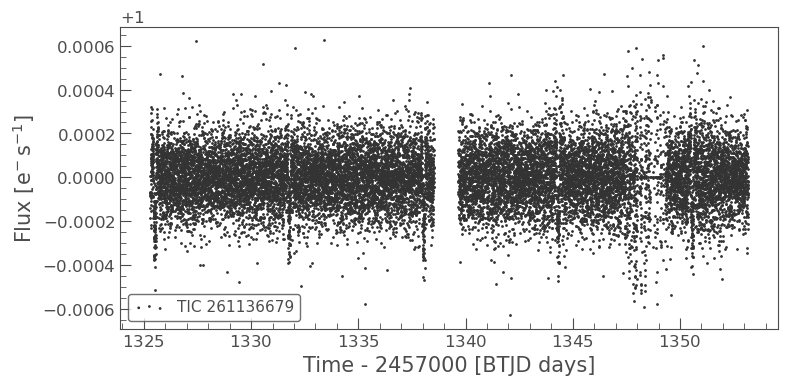

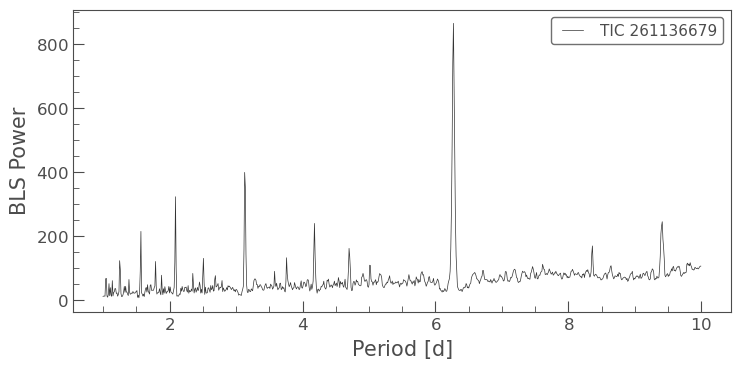

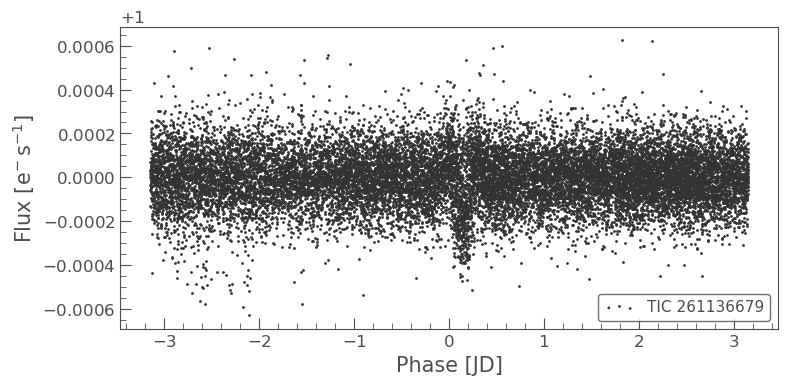

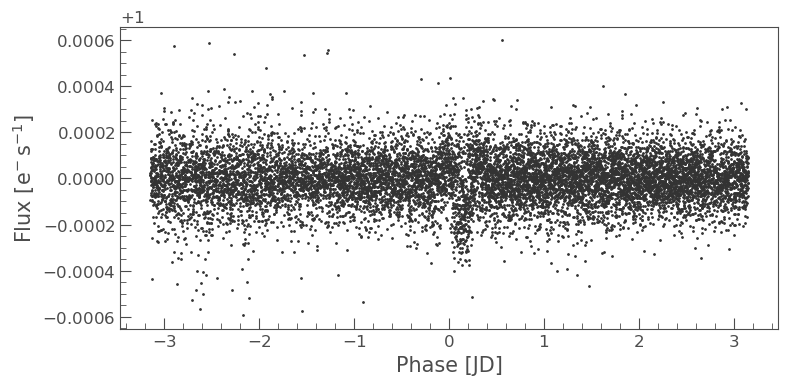

In [4]:

##########################################   Pi Men C   ###########################################################

import lightkurve as lk
from lightkurve import TessTargetPixelFile
import os
s=os.path.sep

from lightkurve import TessTargetPixelFile
lk3=lk.read("E:"+s+"Astronomy"+s+"Exoplanet detection"+s+"MAST_2021-08-20T0134- exo-plan-3"+s+"TESS"+s+"tess2018206045859-s0001-0000000261136679-0120-s"+s+"tess2018206045859-s0001-0000000261136679-0120-s_lc.fits")
lk3

lk3.plot()

lk3_flat=lk3.flatten(window_length=401)
lk3_flat=lk3_flat.remove_outliers(sigma=5)
lk3_flat.scatter()

import numpy as np
periodogram=lk3_flat.to_periodogram(method='bls',period=np.arange(1,10,0.01))
periodogram.plot()

best_fit_period=periodogram.period_at_max_power
print("Best fit period = {:.3f}".format(best_fit_period))

lk3_fold=lk3_flat.fold(period=6.3)
lk3_fold.scatter()

lk3bin=lk3_fold.bin(binsize=2)
lk3bin.scatter()

Therefore from the dip in the above plot we can thus infer that the above star Pi Men C has an planet orbiting it

Best fit period: 8.22250 d


<ipython-input-5-29f551c4e509>:29: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lk4bin=lk4_fold.bin(binsize=5)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

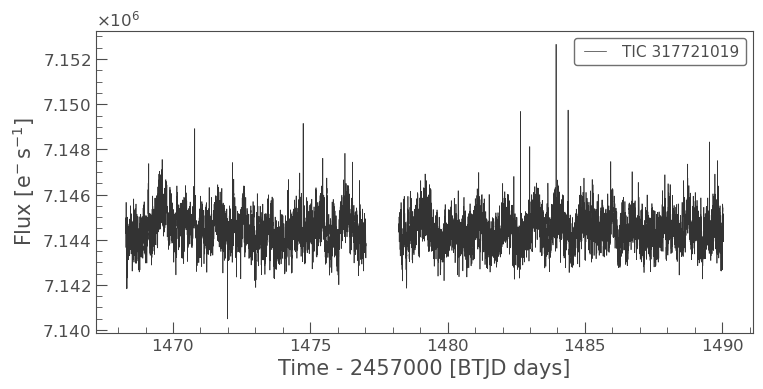

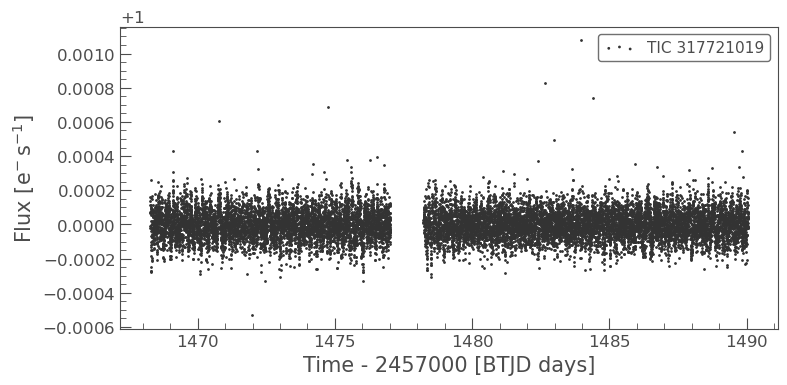

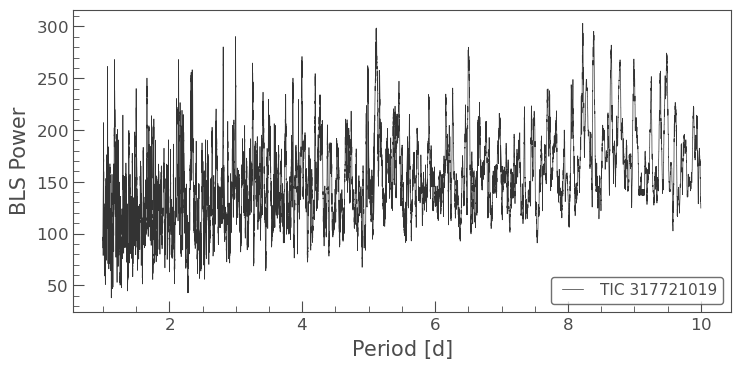

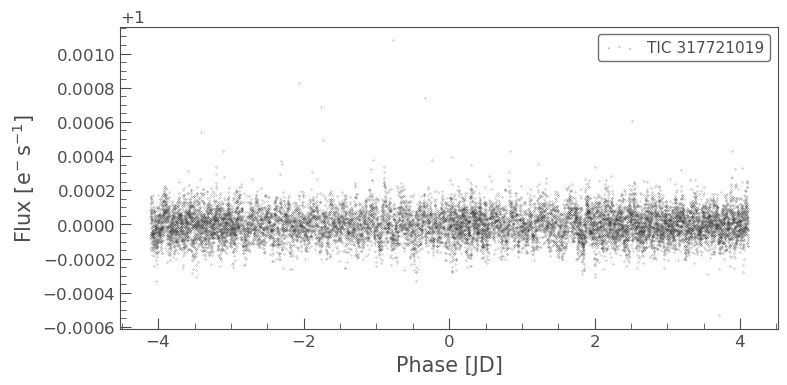

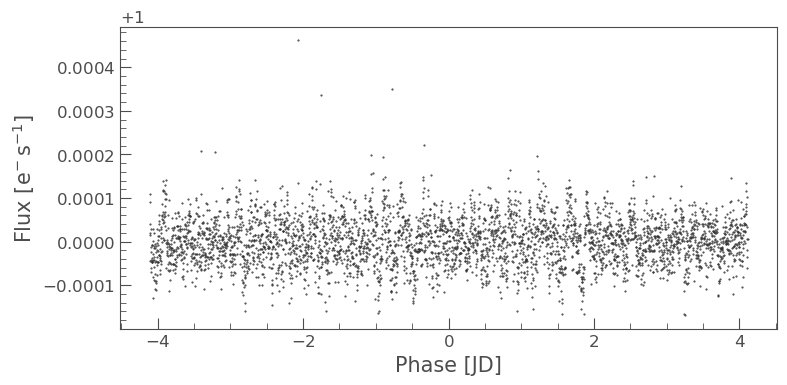

In [5]:

############################################    TIC 317721019     ###################################################

import lightkurve as lk
from lightkurve import TessTargetPixelFile
import os
s=os.path.sep

from lightkurve import TessTargetPixelFile
lk4=lk.read("E:"+s+"Astronomy"+s+"Exoplanet detection"+s+"MAST_2021-08-20T0226- exo-plan-4"+s+"TESS"+s+"tess2018349182500-s0006-0000000317721019-0126-s"+s+"tess2018349182500-s0006-0000000317721019-0126-s_lc.fits")
lk4

lk4.plot()

lk4_flat=lk4.flatten(window_length=401)
lk4_flat.scatter()

import numpy as np
periodogram=lk4_flat.to_periodogram(method='bls',period=np.arange(1,10,0.0001))
periodogram.plot()

############   Doesn't look like there is a planet argoing around this star ##########

best_fit_period=periodogram.period_at_max_power
print("Best fit period: {:.5f}".format(best_fit_period))

lk4_fold=lk4_flat.fold(period=8.22250)
lk4_fold.scatter(s=0.1)

lk4bin=lk4_fold.bin(binsize=5)
lk4bin.scatter(s=1)

There is no clear period visible in the flux-time curve.  
In the periodogram plotted there is no specific dip in the graph, thus indicating that there is no planet; even though the plot looks like there is variation in flux intensity of star, TIC 317721019 may be a variable star.

Best fit period: 1.84280 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

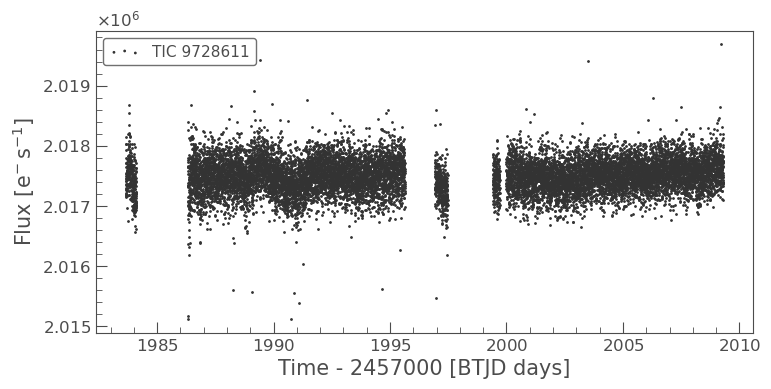

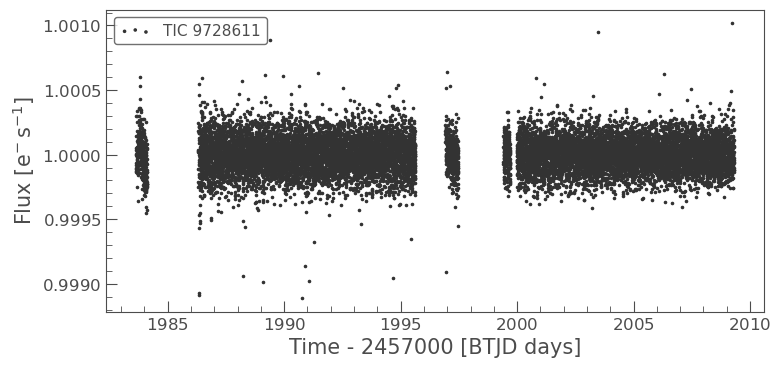

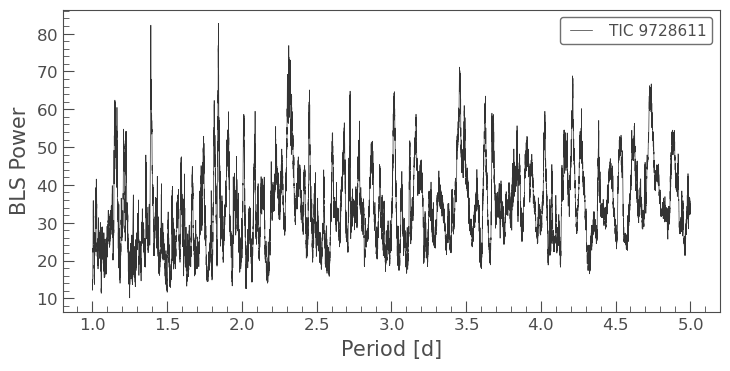

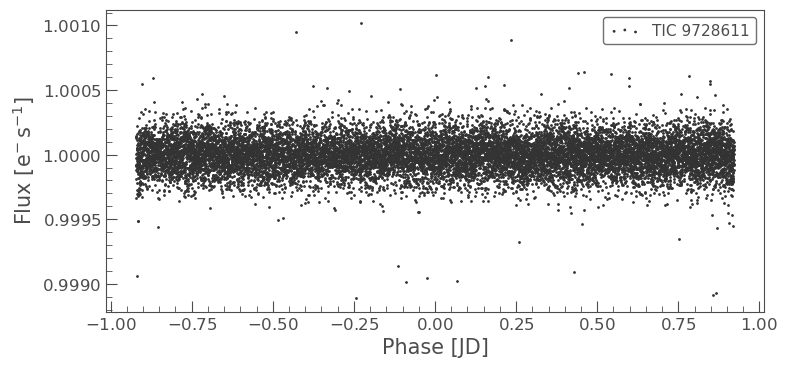

In [6]:
##############################################     TIC 9728611    #################################################

import lightkurve as lk
from lightkurve import TessTargetPixelFile
import os
s=os.path.sep

from lightkurve import TessTargetPixelFile
lk5=lk.read("E:"+s+"Astronomy"+s+"Exoplanet detection"+s+"MAST_2021-08-20T0304- exo-plan-5"+s+"TESS"+s+"tess2020133194932-s0025-0000000009728611-0182-s"+s+"tess2020133194932-s0025-0000000009728611-0182-s_lc.fits")
lk5

lk5.scatter()

lk5_flat=lk5.flatten(window_length=401)
lk5_flat.scatter(s=10)




###############   Doesn't Look like there is an exoplanet   #############




import numpy as np
periodogram=lk5_flat.to_periodogram(method='bls',period=np.arange(1,5,0.0001))
periodogram.plot()

best_fit_period=periodogram.period_at_max_power
print("Best fit period: {:.5f}".format(best_fit_period))

lk5_fold=lk5_flat.fold(period=1.8428)
lk5_fold.scatter()

This star also seems to have a periodic variation in the flux intensity but by plotting the periodogram we get that the star has no exoplanet (No dip in the flux phase graph)

Best fit period: 4.78420 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

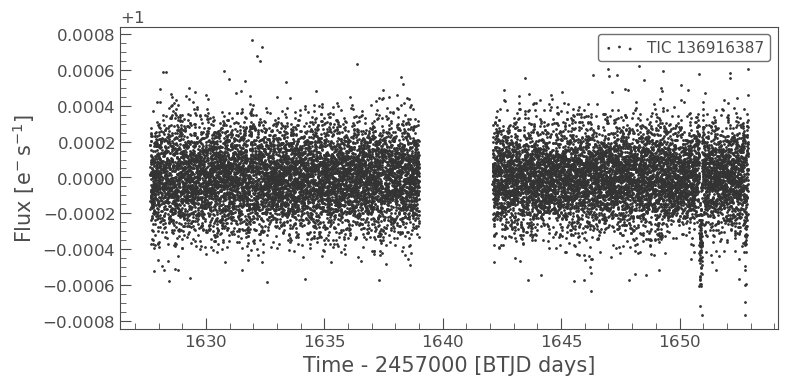

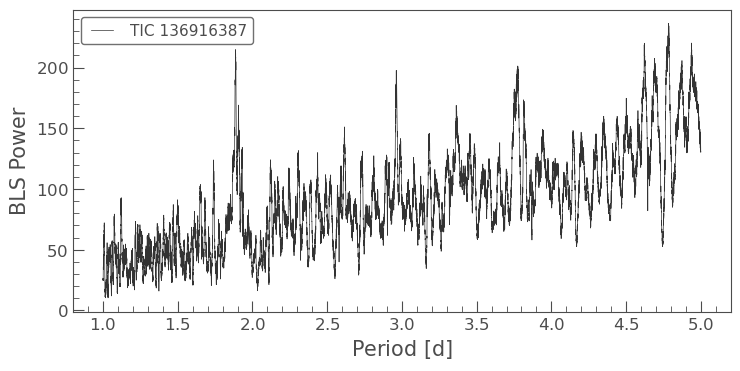

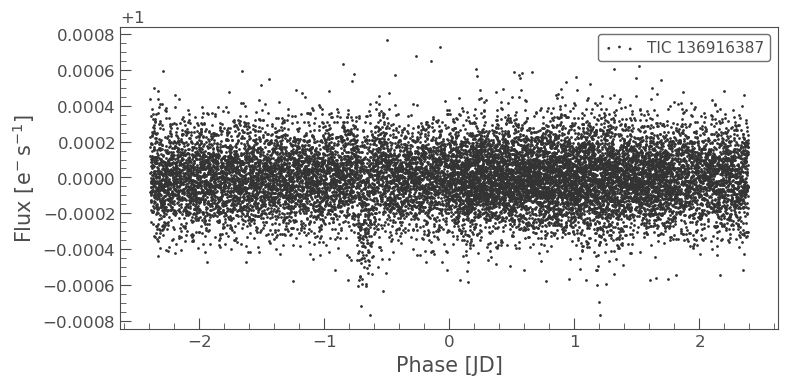

In [9]:
##########################################    TIC 136916387   ################################################

import lightkurve as lk
from lightkurve import TessTargetPixelFile
import os
s=os.path.sep

from lightkurve import TessTargetPixelFile
lk6=lk.read("E:"+s+"Astronomy"+s+"Exoplanet detection"+s+"MAST_2021-08-21T0605- exo-plan-6"+s+"TESS"+s+"tess2019140104343-s0012-0000000136916387-0144-s"+s+"tess2019140104343-s0012-0000000136916387-0144-s_lc.fits")
lk6

lk6_flat=lk6.flatten(window_length=401)
lk6_flat= lk6_flat.remove_outliers(sigma=5)
lk6_flat.scatter()

import numpy as np
periodogram=lk6_flat.to_periodogram(method='bls',period=np.arange(1,5,0.0001))
periodogram.plot()

best_fit_period=periodogram.period_at_max_power
print("Best fit period: {:.5f}".format(best_fit_period))

lk6_fold=lk6_flat.fold(period=4.78417)
lk6_fold.scatter()

#lk6bin=lk6_fold.bin(binsize=2)
#lk6bin.scatter(s=1)

From the lightkurve we get that the star has a proper period of variation of intesity, so by finding the period and plotting the same we get that the plot has dip in the graph and thus could be due to an exoplanet around it.  
TIC 136916387 has an exoplanet going around it.

# CONCLUSION
Lightkurve is a gift to the exoplanet detection community, which helps us easily identify whether a planet is going around the star or not. And having information from the radial velocity method also we can determine various properties of the planet like the mass, time period etc. With transit spectroscopy, we can also find the chemical composition of the planet.             
    Though, one of the biggest disadvantages of the transit method is the relative positioning and geometry. For this method to be successful the planet should be in an orbit which will result in the planet blocking the path of light which will be reaching us.The probability of observing a transit of a planet the size of Earth at the distance from Earth is 0.5%(quite small).

# FUTURE SCOPE
This method of detection of exoplanet can be automated by the usage of machine learning, wherby, the the already existing lightkurves can be used for learning purposes and the new data yet to be verified can use to detect exoplanets and thus reducing effort, time and errors.